In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lucknow-city-india-450-housing-prices-updated/lucknow_hosuing_prices - Main File.csv


## Importing ML and Viz Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Loading Data

In [5]:
df = pd.read_csv('/kaggle/input/lucknow-city-india-450-housing-prices-updated/lucknow_hosuing_prices - Main File.csv')

In [6]:
df.head()

,bhk,type,area_sq_ft,location,price_lakh,carpet_area,status,bathrooms
0,3,Independent,1100,Rajajipuram,33.0,720,StatusReady,2
1,3,Independent,1200,Sarojini Nagar,27.0,NaN,StatusUnder,2
2,2,Independent,1250,Jankipuram,50.0,1000,StatusReady,2
3,3,Independent,1320,Omaxe City,42.0,900,StatusReady,3
4,3,Independent,900,Vrindavan Yojna,48.0,,StatusReady,2


## Preparing Data for ML Model Training

In [7]:
df.dtypes

bhk              int64
type            object
area_sq_ft       int64
location        object
price_lakh     float64
carpet_area     object
status          object
bathrooms        int64
dtype: object

In [8]:
df.isna().sum()

bhk              0
type             0
area_sq_ft       0
location         0
price_lakh       0
carpet_area    152
status           0
bathrooms        0
dtype: int64

In [9]:
df['carpet_area'] = df['carpet_area'].fillna(0)

In [10]:
df.isna().sum()

bhk            0
type           0
area_sq_ft     0
location       0
price_lakh     0
carpet_area    0
status         0
bathrooms      0
dtype: int64

In [11]:
df['carpet_area'].unique()

array(['720', 0, '1000', '900', ' ', '1120', '300', '600', '800', '840',
       '1250', '750', '950', '630', '1100', '500', '700', '920', '1160',
       '650', '1010', '1025', '875', '850', '620', '749', '835', '1080',
       '622', '820', '680', '799', '999', '740', '934', '790', '1200',
       '704', '734', '977', '430', '220', '1008', '936', '1500', '504',
       '420', '748', '924', '930', '422', '775', '1124', '960', '395',
       '375', '860', '400', '60', '966', '975', '1175', '880', '980',
       '580', '1230', '100', '521', '890', '816', '275', '1143', '440',
       '1015', '786'], dtype=object)

In [12]:
df['carpet_area'] = df['carpet_area'].replace(' ',0)

In [13]:
df['carpet_area'] = df['carpet_area'].astype('float')

In [14]:
# One Hot Encoding For Linear Regression
df_num = pd.get_dummies(df,dtype=int,drop_first = True)

In [15]:
df_num.head()

,bhk,area_sq_ft,price_lakh,carpet_area,bathrooms,type_Studio,type_Villa,location_Aashiyana,location_Alambagh,location_Amity University Road,...,location_Sultanpur Road,location_Surendra Nagar,location_Takrohi,location_Tiwariganj,location_Uattardhona,location_Vijay Nagar,location_Vikas Nagar,location_Villa,location_Vrindavan Yojna,status_StatusUnder
0,3,1100,33.0,720.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1200,27.0,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,1250,50.0,1000.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1320,42.0,900.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,900,48.0,0.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
#Checking number of columns after one hot encoding
len(df_num.columns)

116

In [17]:
x = df_num.drop(columns='price_lakh')
y = df_num['price_lakh']

## Training and Testing Linear Regression Model

In [18]:
model = LinearRegression()

In [19]:
scores = cross_val_score(model,x,y,cv=5)
print('scores are',scores)
print('mean score is ',scores.mean())

scores are [-5.38807594e-01 -1.80033994e+19  4.14101987e-01 -1.85842035e+16
  3.93080326e-01]
mean score is  -3.604396711624903e+18


**Very Bad Model Score beause of too many different categorical values.**

## Bad Model Score : Try Solution 1 (Applying PCA)

In [20]:
to_be_scaled = x[['area_sq_ft','carpet_area']]

In [21]:
scale = StandardScaler()

In [22]:
scaled = scale.fit_transform(to_be_scaled)

In [23]:
x[['area_sq_ft','carpet_area']] = scaled

In [24]:
x.shape

(474, 115)

In [25]:
# Loading pca object
pca = PCA(0.9)

In [26]:
x_pca = pca.fit_transform(x)

In [27]:
x_pca.shape

(474, 20)

In [28]:
cross_val_score(LinearRegression(),x_pca,y,cv=10)
print('scores are',scores)
print('mean score is ',scores.mean())

scores are [-5.38807594e-01 -1.80033994e+19  4.14101987e-01 -1.85842035e+16
  3.93080326e-01]
mean score is  -3.604396711624903e+18


**Very bad score even after applying PCA.**

## Bad Model Score : Try Solution 2 (Check for Overfitting)

In [29]:
X_train,X_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
model.score(X_train,y_train)

0.8302978371635847

In [32]:
model.score(X_test,y_test)

-3.1258810375549642e+22

**Since, training score is very very large comparing to testing score, it indicates the model is overfitted.**

## Overfit Model to Balance Fit (Lasso and Ridge)

In [33]:
model_ridge = Ridge(alpha=1)

In [34]:
model_ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [35]:
model_ridge.score(X_train,y_train)

0.8021427003033593

In [36]:
model_ridge.score(X_test,y_test)

0.5121505618801915

In [37]:
lasso = Lasso(alpha=1)

In [38]:
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [39]:
lasso.score(X_train,y_train)

0.4490248537678645

In [40]:
lasso.score(X_test,y_test)

0.3286205734587032

**Ridge Regularization is much effective than Lasso, but still model is not performing Good.**

## Making My Data representative for better Model Performance

In [41]:
values = df['location'].value_counts()
values[:30]

location
Faizabad Road               52
Jankipuram                  49
Kursi Road                  32
Sitapur Road                24
Amity University Road       23
Gomti Nagar                 21
Chinhat                     20
Uattardhona                 15
Malhaur                     13
Indira Nagar                11
Iim Road                    10
Safedabad                   10
Kanpur Road                  9
Neel Matha                   7
Anora Kala                   6
Bijnor Road                  6
Bakshi Ka Talab Talab        6
Alambagh                     6
Bakshi Ka Talab              5
Omaxe City                   5
Raibareilly Road             5
Kanpur Lucknow               4
Gosainganj                   4
Cantonment                   4
Sultanpur Road               4
Deva Road                    4
Vrindavan Yojna              4
Munshi Pulia                 3
Rama Degree College Road     3
Chinhut                      3
Name: count, dtype: int64

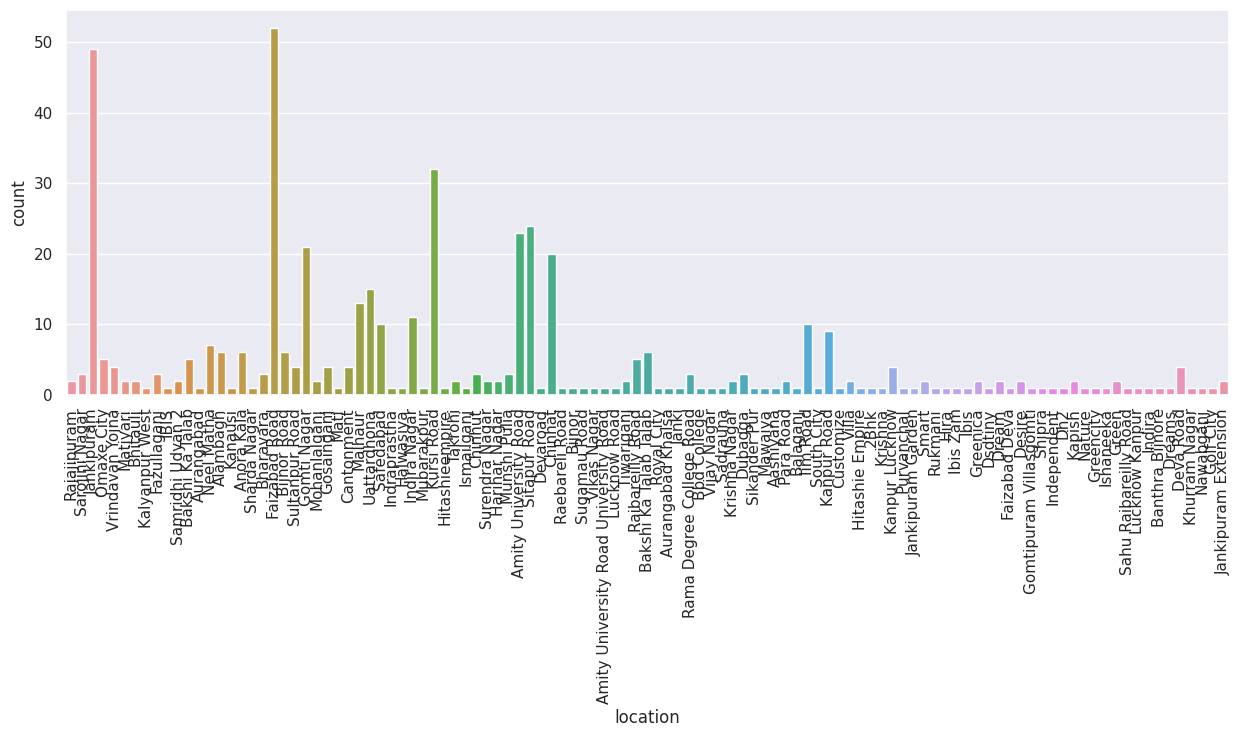

In [42]:
sns.set(rc = {'figure.figsize':(15,5)})
sns.countplot(data=df,x='location')
plt.xticks(rotation=90)
plt.show()

**We can verify it again that our dataset is too small in terms of representing almost all locations.So, we will include only those locations which have count 25.**

In [43]:
values_at_least_25 = values[values>=25]

In [44]:
values_at_least_25.index

Index(['Faizabad Road', 'Jankipuram', 'Kursi Road'], dtype='object', name='location')

In [45]:
df_new = df[df['location'].isin(values_at_least_25.index)]

In [46]:
df_new['location'].value_counts()

location
Faizabad Road    52
Jankipuram       49
Kursi Road       32
Name: count, dtype: int64

In [47]:
len(df_new)

133

In [48]:
df_num_new = pd.get_dummies(df_new,drop_first = True,dtype=int)

In [49]:
df_num_new.head()

,bhk,area_sq_ft,price_lakh,carpet_area,bathrooms,type_Villa,location_Jankipuram,location_Kursi Road,status_StatusUnder
2,2,1250,50.0,1000.0,2,0,1,0,0
10,2,850,27.0,600.0,1,0,1,0,1
16,2,1500,42.0,1250.0,2,0,1,0,0
26,2,1100,44.0,700.0,2,0,1,0,0
29,2,1100,46.0,1000.0,2,0,1,0,0


In [50]:
x1 = df_num_new.drop(columns='price_lakh')

In [51]:
y1 = df_num_new['price_lakh']

In [52]:
scores_new = cross_val_score(LinearRegression(),x1,y1,cv=5)
print('model scores',scores_new)
print('mean score',scores_new.mean())

model scores [0.36566241 0.30429575 0.66619614 0.58802029 0.14556249]
mean score 0.4139474164413806


In [53]:
cross_val_score(Ridge(),x1,y1,cv=5).mean()

0.43596038306662355

In [54]:
to_be_scaled2 = df_num_new[['area_sq_ft','carpet_area']]

In [55]:
scaled_new = scale.fit_transform(to_be_scaled2)

In [56]:
x1[['area_sq_ft','carpet_area']]= scaled_new

In [57]:
pca = PCA(0.95)

In [58]:
x1_pca_new = pca.fit_transform(x1)

In [59]:
x1_pca_new.shape

(133, 6)

In [60]:
cross_val_score(LinearRegression(),x1_pca_new,y1,cv=5).mean()

0.4666329633450624

**I tried lot on all possible solution that I am aware of, but did not get better model score.**